<a href="https://colab.research.google.com/github/shubhe25p/css-iclr2022-nvr/blob/master/EigenFace_on_KayGallant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fname = "kay_labels.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/r638s/download
fname = "kay_labels_val.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/yqb3e/download
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download

In [ ]:
with np.load(fname) as dobj:
    dat = dict(**dobj)
labels = np.load('kay_labels.npy')
val_labels = np.load('kay_labels_val.npy')

In [ ]:
for i in range(4):
  label_list = []
  for labl in labels[i]:
    if labl != 'artifact':
      label_list.append(labl)
  set_labels = set((label_list))
  print('Train Label row %d length %d '%(i, len(set_labels)), sorted(set_labels))

Train Label row 0 length 7  ['animal', 'entity', 'fruit', 'fungus', 'geological formation', 'person', 'plant']
Train Label row 1 length 30  ['acorn', 'cliff', 'commodity', 'covering', 'creation', 'decoration', 'ear', 'earthstar', 'edible fruit', 'explorer', 'fabric', 'gyromitra', 'hen-of-the-woods', 'hip', 'instrumentality', 'invertebrate', 'natural depression', 'natural elevation', 'round shape', 'seed', 'sheet', 'shore', 'solid', 'spring', 'structure', 'substance', 'surface', 'vascular plant', 'vertebrate', 'visual signal']
Train Label row 2 length 86  ['acorn', 'adornment', 'altar', 'amphibian', 'apple', 'aquatic vertebrate', 'arch', 'area', 'arthropod', 'banana', 'berry', 'bird', 'board', 'bridge', 'buckeye', 'building', 'building complex', 'citrus', 'cliff', 'cloak', 'cloth covering', 'clothing', 'coelenterate', 'coil', 'column', 'connection', 'consumer goods', 'container', 'conveyance', 'custard apple', 'defensive structure', 'design', 'device', 'diver', 'ear', 'earthstar', 'echi

In [ ]:
for i in range(4):
  label_list = []
  for labl in val_labels[i]:
    if labl != 'artifact':
      label_list.append(labl)
  set_labels = set((label_list))
  print('Val Label row %d length %d '%(i, len(set_labels)), sorted(set_labels))

Val Label row 0 length 5  ['animal', 'entity', 'fruit', 'fungus', 'geological formation']
Val Label row 1 length 14  ['acorn', 'covering', 'creation', 'edible fruit', 'hen-of-the-woods', 'instrumentality', 'invertebrate', 'natural depression', 'natural elevation', 'shore', 'solid', 'structure', 'substance', 'vertebrate']
Val Label row 2 length 32  ['acorn', 'amphibian', 'area', 'arthropod', 'bird', 'bridge', 'building', 'citrus', 'cloak', 'clothing', 'column', 'device', 'equipment', 'establishment', 'food', 'fountain', 'furnishing', 'hen-of-the-woods', 'implement', 'lakeside', 'mammal', 'mountain', 'obstruction', 'product', 'promontory', 'protective covering', 'reptile', 'ridge', 'seashore', 'supporting structure', 'top', 'valley']
Val Label row 3 length 84  ['Afghan hound', 'American alligator', 'American black bear', 'French loaf', 'Indian elephant', 'Komodo dragon', 'abaya', 'acorn squash', 'alp', 'bald eagle', 'banded gecko', 'bannister', 'barbershop', 'bell cote', 'bell pepper', '

In [ ]:
plt.imshow(dat['stimuli'][535])

In [ ]:
plt.imshow(dat['stimuli'][377])

In [ ]:
plt.imshow(dat['stimuli'][1662])

In [ ]:
for id, j in enumerate(labels[3]):
    if j == 'orange':
      print(id)

377
535
1662


In [ ]:
img_list = []
img_list.append(dat["stimuli"][377])
img_list.append(dat["stimuli"][535])
img_list.append(dat["stimuli"][1662])
imgs_org = np.array(img_list)

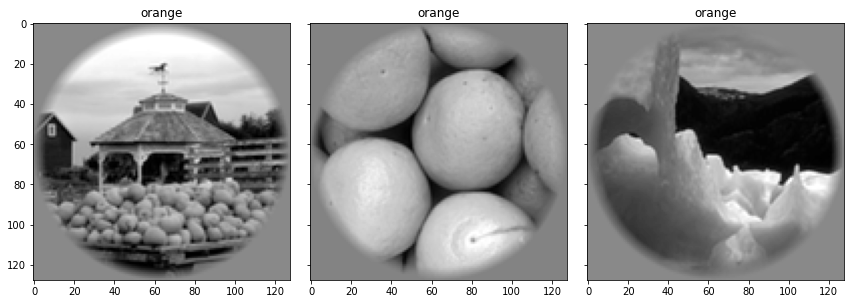

In [ ]:
f, axs = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)
for ax, im in zip(axs.flat, imgs_org):
  ax.imshow(im, cmap="gray")
  ax.set_title('orange')
f.tight_layout()

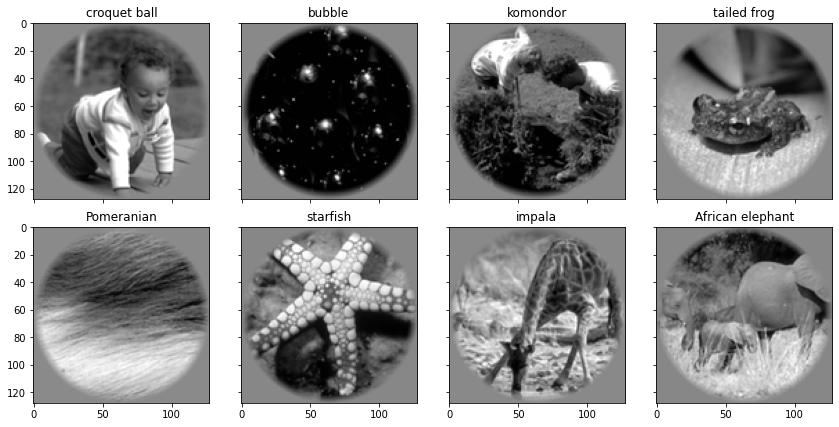

In [ ]:
f, axs = plt.subplots(2, 4, figsize=(12, 6), sharex=True, sharey=True)
for ax, im, lbl in zip(axs.flat, dat["stimuli"], labels[-1,:]):
  ax.imshow(im, cmap="gray")
  ax.set_title(lbl)
f.tight_layout()

In [ ]:
v1_idxs = np.where(dat['roi'] == 1)
v1_response = dat['responses'][:,v1_idxs[0]]
v1_response.shape

(1750, 1294)

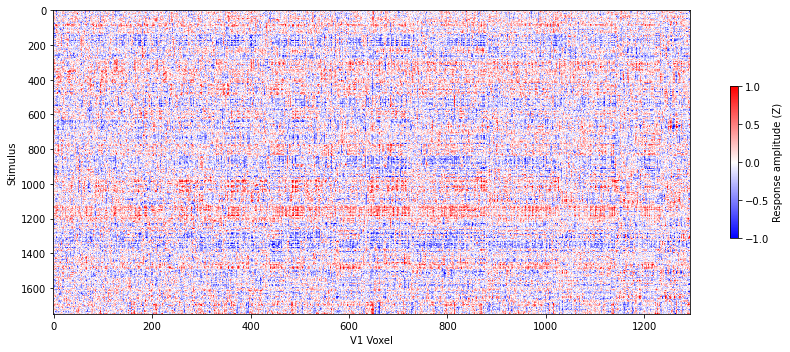

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="V1 Voxel", ylabel="Stimulus")
heatmap = ax.imshow(v1_response, aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

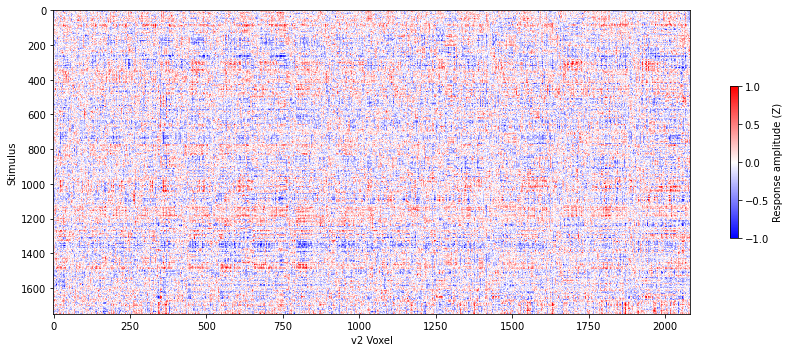

In [ ]:
v2_idxs = np.where(dat['roi'] == 2)
v2_response = dat['responses'][:,v2_idxs[0]]
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="v2 Voxel", ylabel="Stimulus")
heatmap = ax.imshow(v2_response, aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

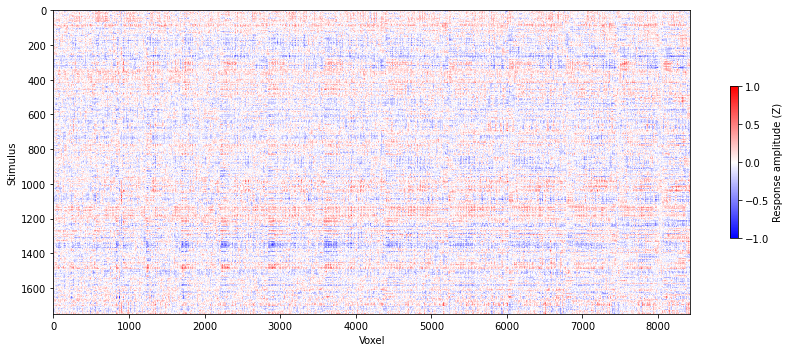

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="Stimulus")
heatmap = ax.imshow(dat["responses"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

In [ ]:
X = dat['responses']
X.shape

(1750, 8428)

In [ ]:
imgs = dat['stimuli']
imgs = imgs.reshape(1750,-1)
imgs.shape

(1750, 16384)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.96)
img1_comp = pca.fit_transform(imgs)
img1_recons = pca.inverse_transform(img1_comp)

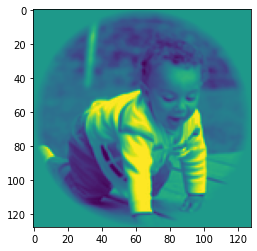

In [ ]:
plt.imshow(dat['stimuli'][0])

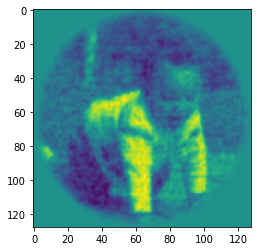

In [ ]:
plt.imshow(img1_recons[0].reshape(128,128))

In [ ]:
img1_comp.shape
y = img1_comp
y.shape

(1750, 641)

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [ ]:
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 20)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X[:20], y[:20], n_comp=19)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)


In [ ]:
with plt.style.context('ggplot'):
  plt.plot(xticks, np.array(rpds), '-v', color='blue', mfc='blue')
  idx = np.argmax(rpds)
  plt.plot(xticks[idx], np.array(rpds)[idx], 'P', ms=10, mfc='red')

  plt.xlabel('Number of PLS components')
  plt.xticks = xticks
  plt.ylabel('RPD')
  plt.title('PLS')

plt.show()

In [ ]:
pls_model = PLSRegression(n_components=180, max_iter=700)
pls_model.fit(X[:300], y[:300])

In [ ]:
np.arange(1,5)

In [ ]:
r2 = r2_score(y[300:400], y_pred)
r2

In [ ]:
r2_list = []
for i in range(90, 180):
  
  pls_model = PLSRegression(n_components=i, max_iter = 700)
  pls_model.fit(X[:500], y[:500])
  y_pred = pls_model.predict(X[500:600])
  r2 = r2_score(y[500:600], y_pred)
  r2_list.append(r2)
  if i%5 == 0:
    print("For component %d r2 score is %f"%(i, r2))
plt.plot(r2_list, np.arange(90, 180))
plt.xlabel('r2-score')
plt.ylabel('inc components')
plt.title('Plot to study trend')

For component 90 r2 score is -0.086098
For component 95 r2 score is -0.089931
For component 100 r2 score is -0.094054


/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:96: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


For component 105 r2 score is -0.097213


/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:96: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:96: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:96: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:96: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


KeyboardInterrupt: ignored

In [ ]:
len(r2_list)

20

Text(0.5, 1.0, 'Plot to study trend')

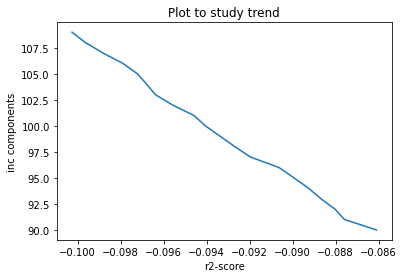

In [ ]:
plt.plot(r2_list, np.arange(90, 110))
plt.xlabel('r2-score')
plt.ylabel('inc components')
plt.title('Plot to study trend')

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class NaiveNet(nn.Module):
  def __init__(self):
    super(NaiveNet, self).__init__()

    self.mlp = nn.Sequential(
        nn.Linear()
    )